Reference https://blog.quantinsti.com/random-forest-algorithm-in-python/

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import accuracy_score
import yfinance as yf

In [157]:
data = pd.read_csv('data/ticker_TSLA.csv')
# data = yf.download('APPS', group_by="Ticker", period="3y", start="2018-01-01")

In [181]:
# Features construction 
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)


In [215]:
# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
# If tomorrow’s close price is greater than today's close price then the output variable is set to 1 and otherwise set to -1.
# y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)
# If tomorrow’s low price is greater than today's open price then the output variable is set to 1 and otherwise set to -1.
y = np.where(data['Low'].shift(-1) > data['Open'], 1, -1)

In [216]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)

# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8339, 4) (2780, 4)
(8339,) (2780,)


In [217]:
clf = RandomForestClassifier(random_state=20)
# Create the model on train dataset
model = clf.fit(X_train, y_train)

print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

report = classification_report(y_test, model.predict(X_test))
print(report)

Correct Prediction (%):  81.51079136690647
              precision    recall  f1-score   support

          -1       0.85      0.88      0.87      1913
           1       0.72      0.66      0.69       867

    accuracy                           0.82      2780
   macro avg       0.79      0.77      0.78      2780
weighted avg       0.81      0.82      0.81      2780



In [218]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

# Return

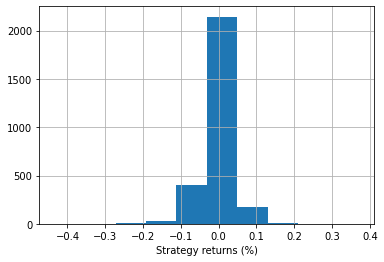

In [219]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

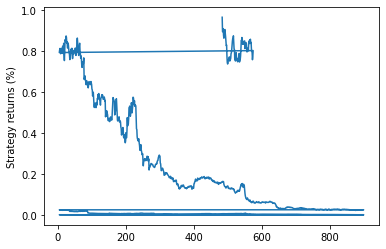

In [220]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()

# Test on today

In [221]:
xt = X.tail(5)
model.predict(xt)

array([-1, -1, -1, -1, -1])

# Add Date feature

In [179]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df['month'] = df.Date.dt.month
# df['week'] = df.Date.dt.week
# df['day'] = df.Date.dt.day
df['day_of_week'] = df.Date.dt.dayofweek

# X is the input variable
X = df[['Open-Close', 'High-Low', 'std_5', 'ret_5', 'month', 'day_of_week']]

# Y is the target or output variable
y = np.where(df['Adj Close'].shift(-1) > df['Adj Close'], 1, -1)

In [169]:
# Total dataset length
dataset_length = df.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)

# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(672, 7) (224, 7)
(672,) (224,)


 ## Batch Learning

In [214]:
df_list = list()
tickerStrings = ['AAPL', 'MSFT', 'NIO', 'MSTR','S', 'SOFI', 'FUBO', 'APPS', 'PDD', 'KO', 'TSLA', 'ZI', 'ZM', 'AMD', 'TTD', 'ROKU']
for ticker in tickerStrings:
    data = pd.read_csv('data/ticker_'+ ticker + '.csv')
    data['ticker'] = ticker  # add this column becasue the dataframe doesn't contain a column with the ticker
    data['Open-Close'] = (data.Open - data.Close)/data.Open
    data['High-Low'] = (data.High - data.Low)/data.Low
    data['percent_change'] = data['Adj Close'].pct_change()
    data['std_5'] = data['percent_change'].rolling(5).std()
    data['ret_5'] = data['percent_change'].rolling(5).mean()
    data.dropna(inplace=True)
    df_list.append(data)

# combine all dataframes into a single dataframe
datalist = pd.concat(df_list)

data = datalist